In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir("D:\\umyma\\Internship 10Pearls\\AQI_Predictor")
os.listdir()

['.git',
 '.github',
 'app',
 'data',
 'LICENSE',
 'models',
 'notebooks',
 'README.md',
 'requirements.txt',
 'src',
 'test.csv']

In [3]:
# Loading the dataset
merged_df=pd.read_parquet("data\\raw\\merged_data_bwp.parquet")
merged_df.head(),merged_df.tail(),merged_df.shape

(                  timestamp  temperature_2m  relative_humidity_2m  \
 0 2025-11-05 00:00:00+00:00           18.40             69.179977   
 1 2025-11-05 01:00:00+00:00           17.85             72.555122   
 2 2025-11-05 02:00:00+00:00           17.65             74.685219   
 3 2025-11-05 03:00:00+00:00           19.25             69.346954   
 4 2025-11-05 04:00:00+00:00           21.90             60.446892   
 
    wind_speed_10m  pressure_msl  wind_direction_10m  precipitation  \
 0        8.936778   1010.599976            9.272532            0.0   
 1        9.761578   1011.299988          354.709991            0.0   
 2       10.837435   1012.200012           11.496537            0.0   
 3       10.308830   1012.799988           24.775122            0.0   
 4        8.155807   1013.599976           22.036283            0.0   
 
    cloud_cover_low       pm10      pm2_5  carbon_monoxide  nitrogen_dioxide  \
 0              0.0  68.199997  64.699997            636.0         18.

In [4]:
# Checking  missing values for each column 
merged_df.isna().sum()
#no missing values for any column

timestamp               0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
pressure_msl            0
wind_direction_10m      0
precipitation           0
cloud_cover_low         0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
carbon_dioxide          0
dtype: int64

In [5]:
#checking for duplicate timestamps
merged_df["timestamp"].duplicated().sum()
#no duplicate timestamps


0

In [25]:
# Time-based features (for plotting only)
merged_df["hour"] = merged_df["timestamp"].dt.hour
merged_df["day_of_week"] = merged_df["timestamp"].dt.dayofweek
merged_df["day"] = merged_df["timestamp"].dt.day
merged_df["month"] = merged_df["timestamp"].dt.month

# Lag features (temporary for correlation visualization)
merged_df["pm25_lag1"] = merged_df["pm2_5"].shift(1)
merged_df["pm25_lag6"] = merged_df["pm2_5"].shift(6)
merged_df["pm25_lag24"] = merged_df["pm2_5"].shift(24)

# Rolling features
merged_df["pm25_ma6"] = merged_df["pm2_5"].rolling(6).mean()
merged_df["pm25_ma24"] = merged_df["pm2_5"].rolling(24).mean()

# Change feature
merged_df["pm25_change_1hr"] = merged_df["pm2_5"] - merged_df["pm25_lag1"]

# Drop NaNs for visualization
merged_df = merged_df.dropna()

In [26]:
merged_df.head()
merged_df.tail()

,timestamp,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,wind_direction_10m,precipitation,cloud_cover_low,pm10,pm2_5,...,hour,day_of_week,day,month,pm25_lag1,pm25_lag6,pm25_lag24,pm25_ma6,pm25_ma24,pm25_change_1hr
1411,2026-01-02 19:00:00+00:00,10.05,93.506500,4.669604,1019.299988,152.447281,0.0,0.0,134.600006,131.800003,...,19,4,2,1,152.699997,109.400002,143.000000,147.766668,133.858333,-20.899994
1412,2026-01-02 20:00:00+00:00,9.75,93.491562,4.471107,1019.000000,139.899155,0.0,0.0,113.900002,111.099998,...,20,4,2,1,131.800003,131.800003,150.899994,144.316667,132.200000,-20.700005
1413,2026-01-02 21:00:00+00:00,9.45,93.476570,4.427414,1018.700012,153.435013,0.0,0.0,98.699997,95.699997,...,21,4,2,1,111.099998,149.500000,160.699997,135.350000,129.491667,-15.400002
1414,2026-01-02 22:00:00+00:00,9.10,94.736145,4.978554,1018.599976,167.471207,0.0,0.0,88.199997,85.199997,...,22,4,2,1,95.699997,159.699997,168.600006,122.933333,126.016666,-10.500000
1415,2026-01-02 23:00:00+00:00,8.90,95.697380,5.269422,1018.099976,172.146774,0.0,0.0,82.400002,79.400002,...,23,4,2,1,85.199997,161.100006,172.300003,109.316666,122.145833,-5.799995


In [10]:
merged_df.shape

(1392, 25)

In [11]:
# Summary stats
merged_df.info()
merged_df.describe()

# hourly granularity + no -ve values

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 24 to 1415
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   timestamp             1392 non-null   datetime64[ns, UTC]
 1   temperature_2m        1392 non-null   float32            
 2   relative_humidity_2m  1392 non-null   float32            
 3   wind_speed_10m        1392 non-null   float32            
 4   pressure_msl          1392 non-null   float32            
 5   wind_direction_10m    1392 non-null   float32            
 6   precipitation         1392 non-null   float32            
 7   cloud_cover_low       1392 non-null   float32            
 8   pm10                  1392 non-null   float32            
 9   pm2_5                 1392 non-null   float32            
 10  carbon_monoxide       1392 non-null   float32            
 11  nitrogen_dioxide      1392 non-null   float32            
 12  sulphur_di

,temperature_2m,relative_humidity_2m,wind_speed_10m,pressure_msl,wind_direction_10m,precipitation,cloud_cover_low,pm10,pm2_5,carbon_monoxide,...,hour,day_of_week,day,month,pm25_lag1,pm25_lag6,pm25_lag24,pm25_ma6,pm25_ma24,pm25_change_1hr
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,...,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,17.113506,54.919884,5.077682,1017.061035,162.758072,0.001724,0.315374,81.060844,78.819405,1309.627197,...,11.500000,3.017241,16.362069,11.189655,78.803307,78.615807,77.761925,78.761255,78.381361,0.016092
std,5.297833,19.982250,2.578149,2.342317,96.953758,0.035931,2.866118,46.165199,45.908306,714.921631,...,6.924674,1.970229,8.606817,1.987367,45.912029,45.846207,45.290607,43.082500,31.833020,11.391384
min,7.500000,11.991375,0.000000,1008.500000,1.041609,0.000000,0.000000,8.300000,8.300000,222.000000,...,0.000000,0.000000,1.000000,1.000000,8.300000,8.300000,8.300000,10.016667,27.750000,-87.599991
25%,12.900000,39.794629,3.096837,1015.500000,90.000000,0.000000,0.000000,46.599998,44.099998,763.750000,...,5.750000,1.000000,9.000000,11.000000,44.099998,44.099998,44.099998,47.020834,59.210417,-5.300002
50%,16.049999,54.335955,5.068846,1017.200012,164.744827,0.000000,0.000000,74.000000,71.799999,1169.500000,...,11.500000,3.000000,16.500000,12.000000,71.599998,71.199997,70.650002,71.258334,72.206250,-0.500000
75%,21.312500,68.969700,6.725349,1018.700012,216.027466,0.000000,0.000000,107.599998,104.850002,1711.500000,...,17.250000,5.000000,24.000000,12.000000,104.850002,104.500000,103.099998,102.454166,91.248959,5.099998
max,30.150000,99.002892,13.504799,1023.500000,360.000000,0.900000,44.000000,285.000000,282.200012,4580.000000,...,23.000000,6.000000,31.000000,12.000000,282.200012,282.200012,282.200012,265.716670,211.100000,41.900002


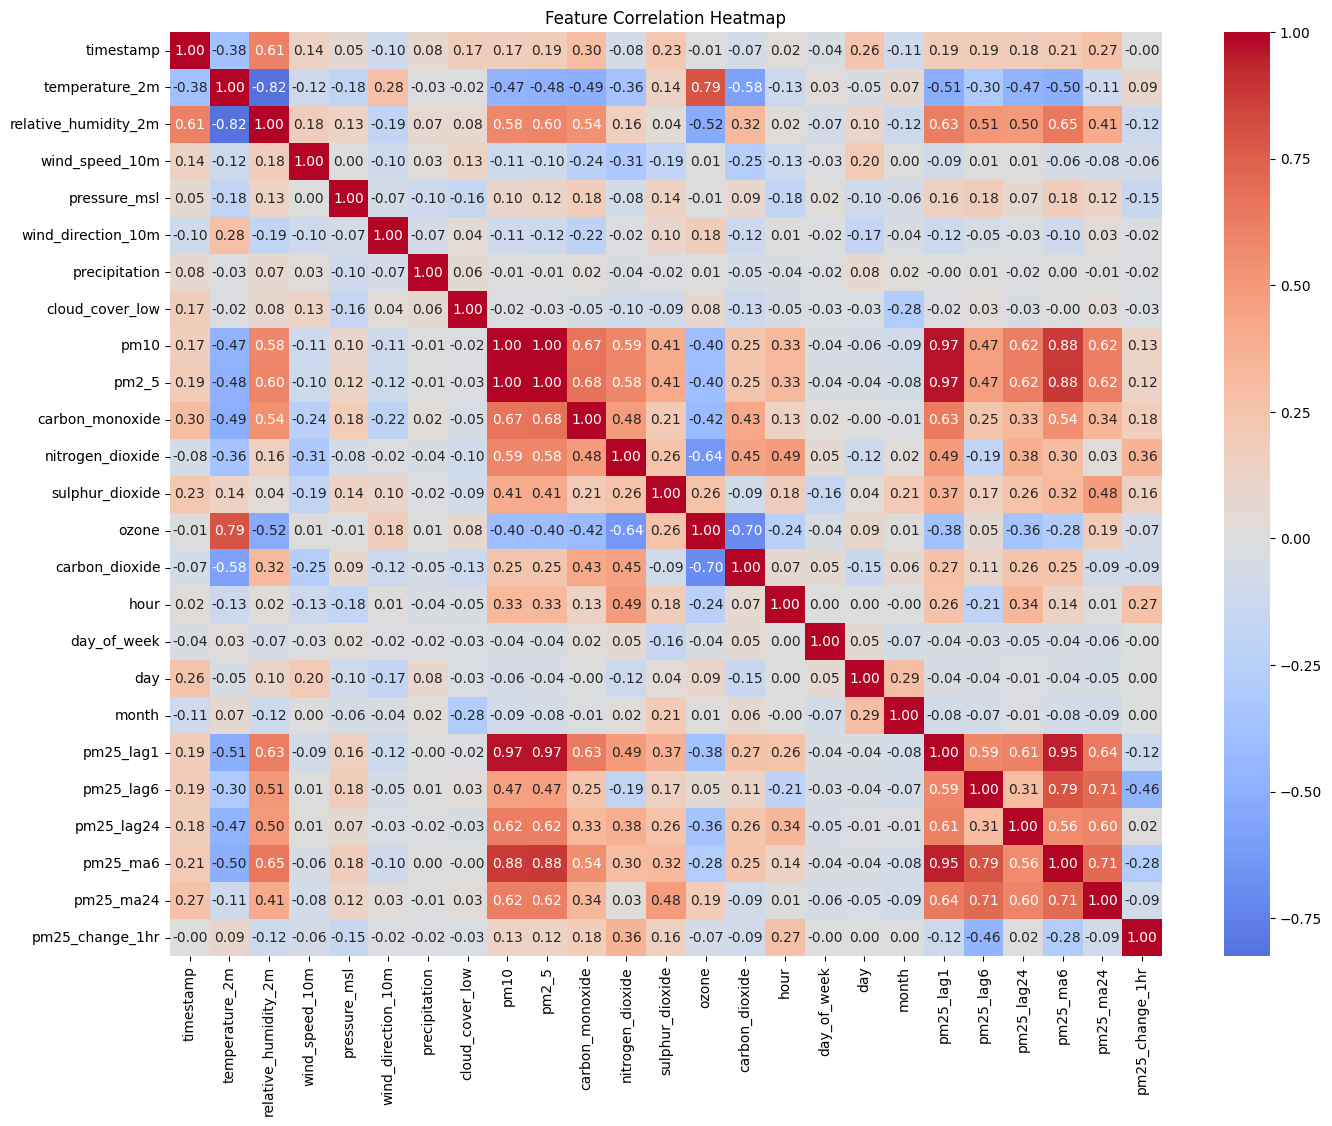

In [12]:
# Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    merged_df.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()

Key Observations:

1: PM2.5 is strongly correlated with lag features, pm10, co and no2

2: Weather effects:

    a) Humidity → positive relation
    b) Temperature → negative relation
    c) Wind speed → dispersion effect
    
3: Some features are noisy or weak

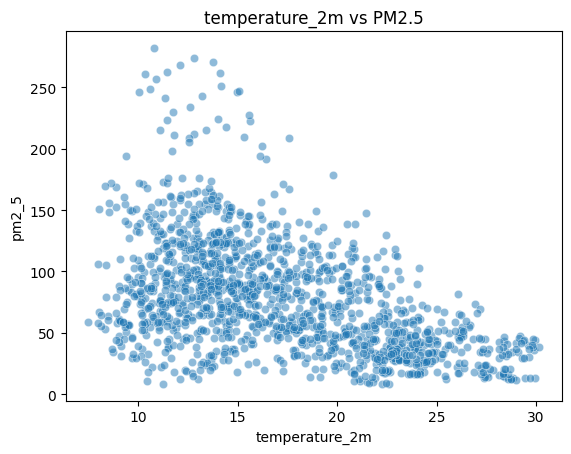

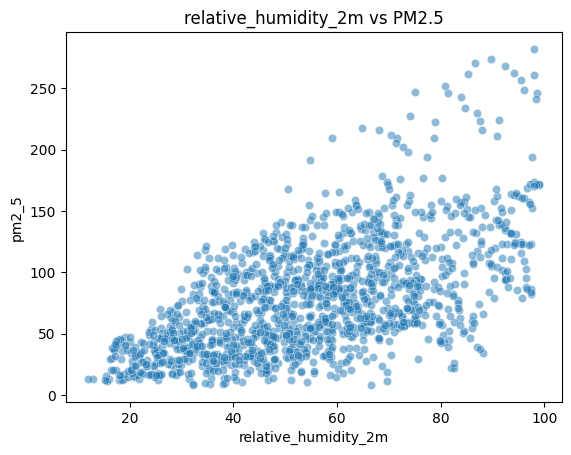

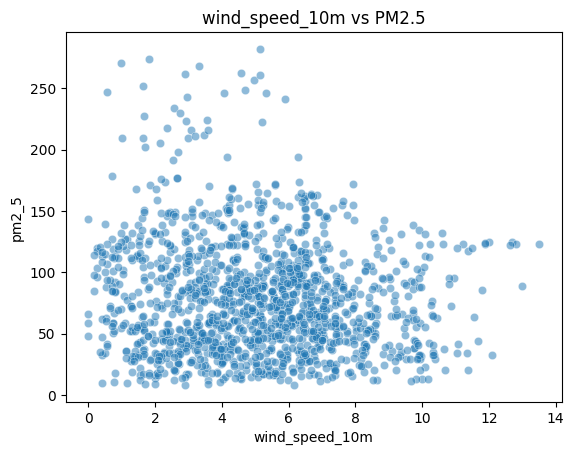

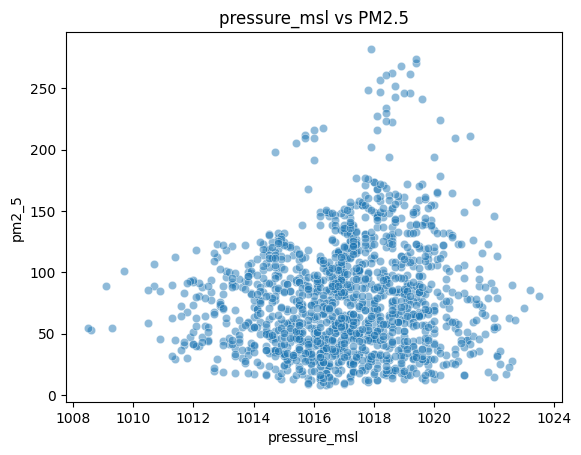

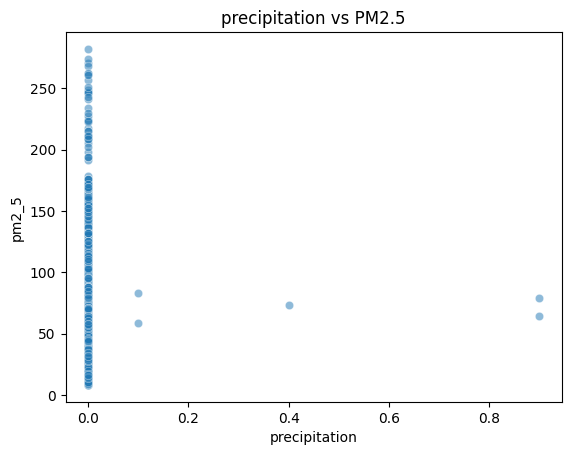

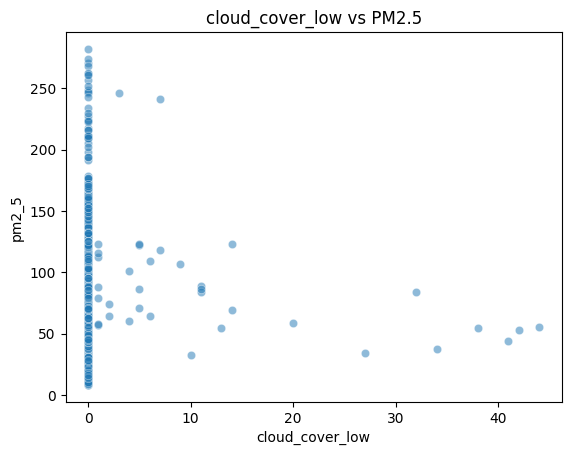

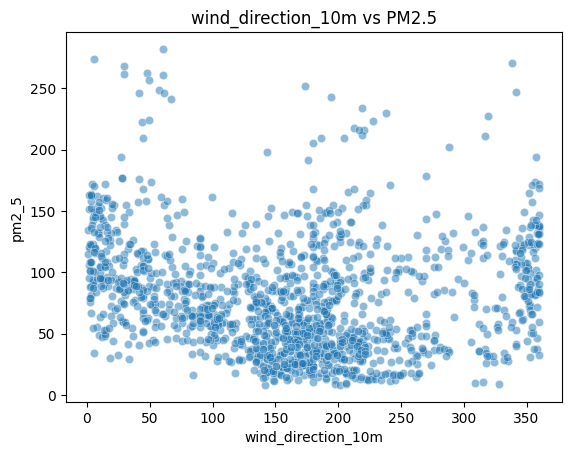

In [13]:
# Checking feature wise relation w target

# Weather Variables
weather_features = [
    "temperature_2m",
    "relative_humidity_2m",
    "wind_speed_10m",
    "pressure_msl",
    "precipitation",
    "cloud_cover_low",
    "wind_direction_10m"
]
for col in weather_features:
    sns.scatterplot(x=col, y="pm2_5", data=merged_df, alpha=0.5)
    plt.title(f"{col} vs PM2.5")
    plt.show()

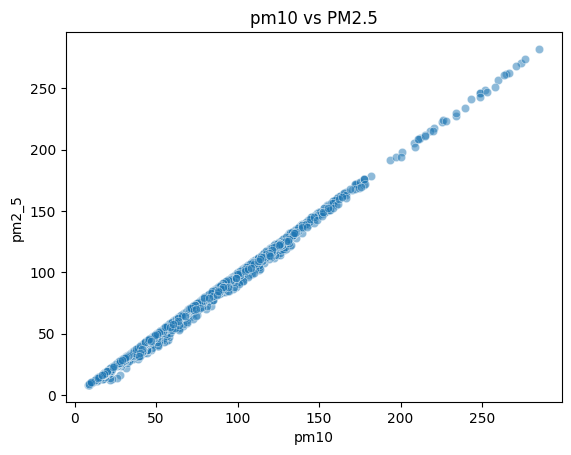

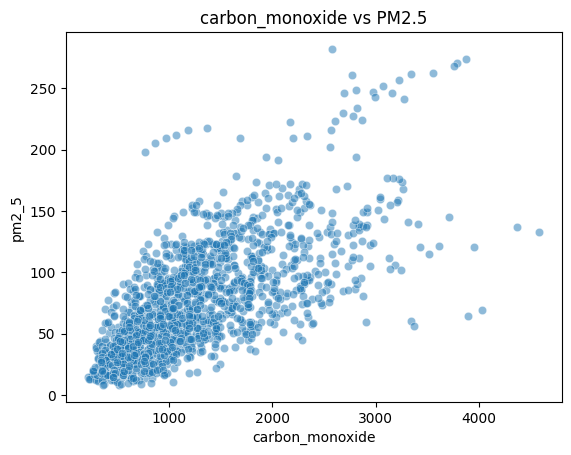

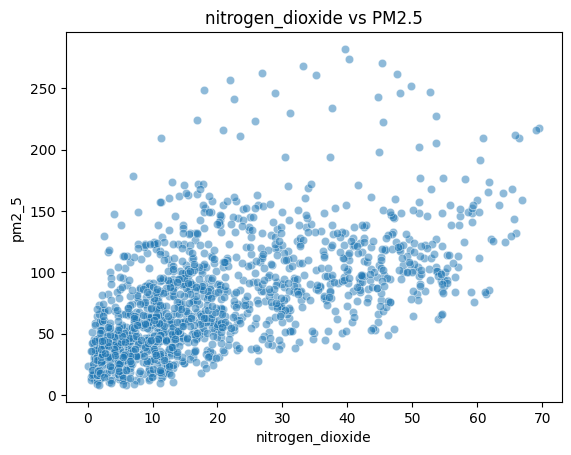

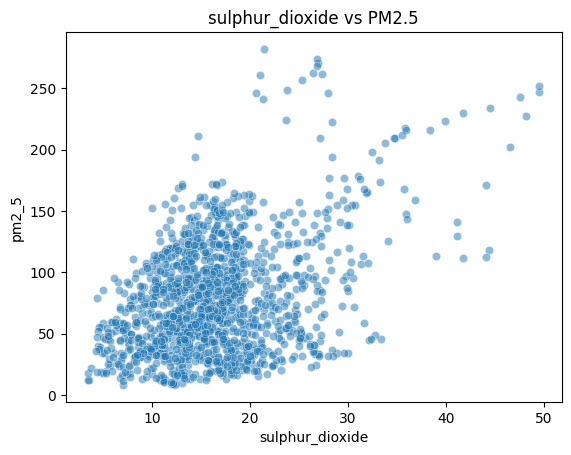

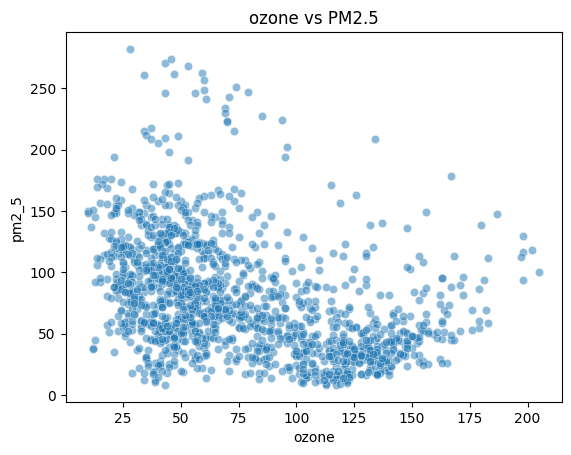

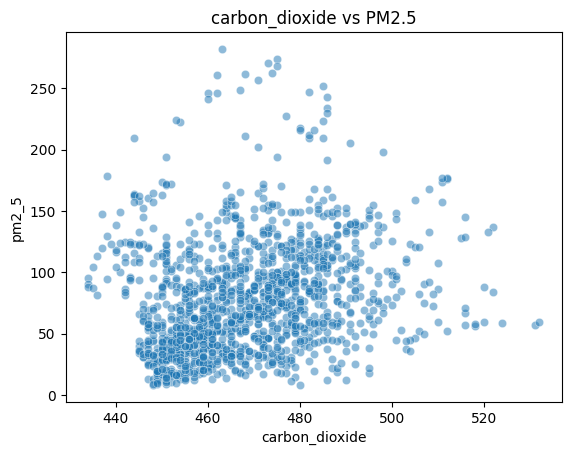

In [14]:
# Pollutants

pollutants = [
    "pm10",
    "carbon_monoxide",
    "nitrogen_dioxide",
    "sulphur_dioxide",
    "ozone",
    "carbon_dioxide"
]
for col in pollutants:
    sns.scatterplot(x=col, y="pm2_5", data=merged_df, alpha=0.5)
    plt.title(f"{col} vs PM2.5")
    plt.show()

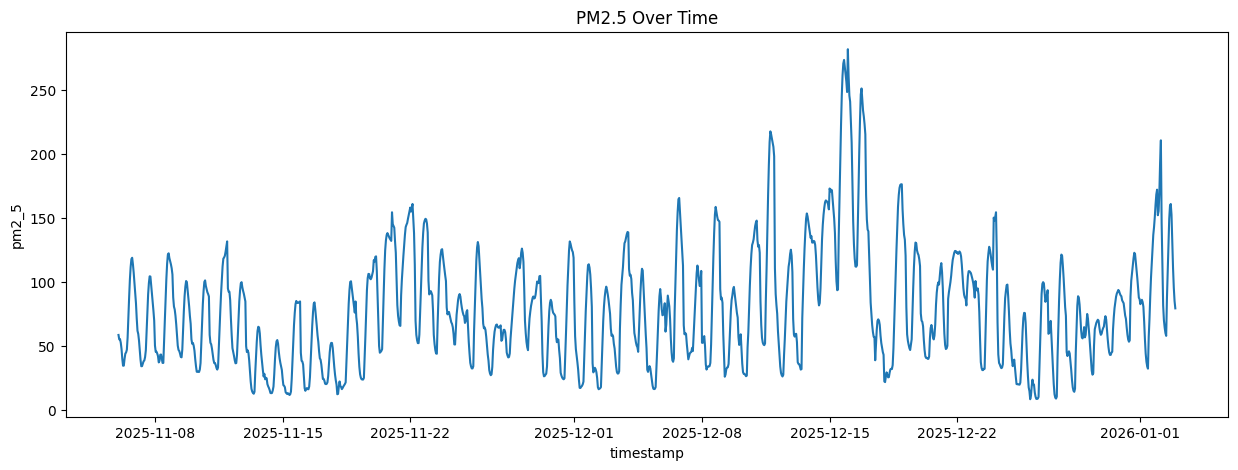

In [15]:
# PM2.5 over time
plt.figure(figsize=(15,5))
sns.lineplot(x='timestamp', y='pm2_5', data=merged_df)
plt.title('PM2.5 Over Time')
plt.show()

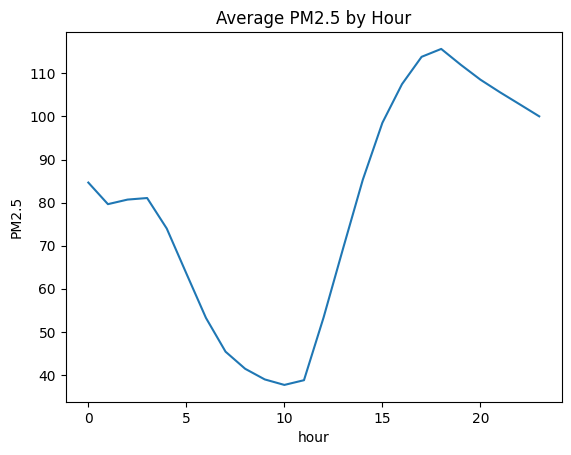

In [16]:
# Hourly trend
merged_df.groupby("hour")["pm2_5"].mean().plot()
plt.title("Average PM2.5 by Hour")
plt.ylabel("PM2.5")
plt.show()

In [17]:
# Validating lag features
merged_df[["pm2_5", "pm25_lag1", "pm25_lag6", "pm25_lag24"]].corr()

,pm2_5,pm25_lag1,pm25_lag6,pm25_lag24
pm2_5,1.000000,0.969217,0.470275,0.618076
pm25_lag1,0.969217,1.000000,0.585086,0.614070
pm25_lag6,0.470275,0.585086,1.000000,0.307042
pm25_lag24,0.618076,0.614070,0.307042,1.000000


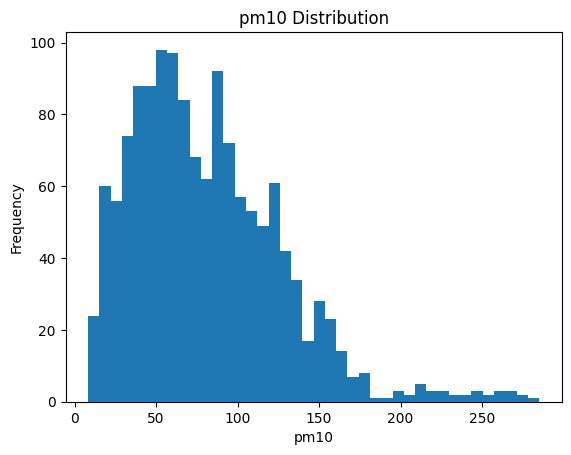

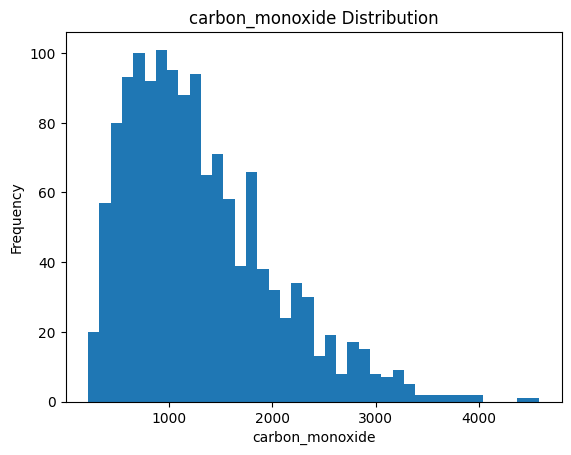

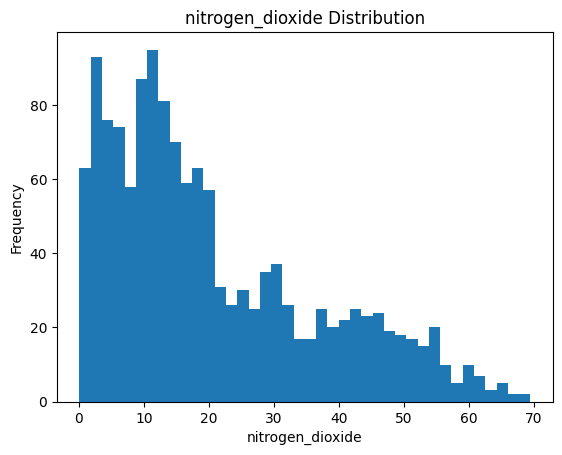

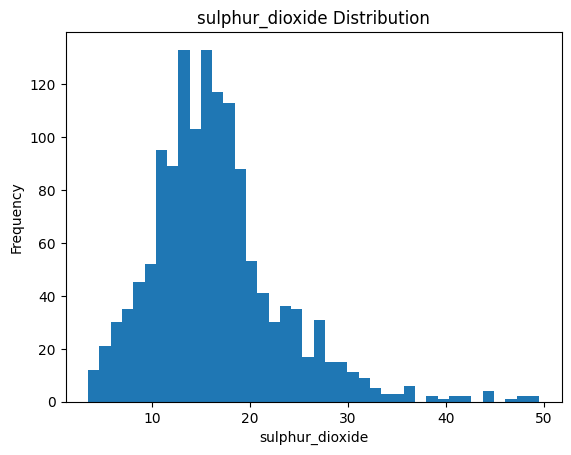

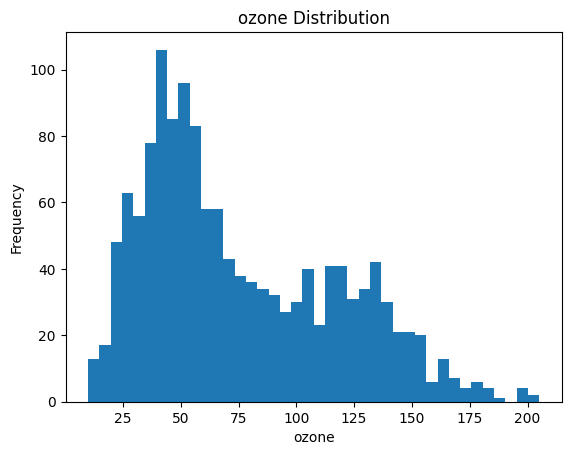

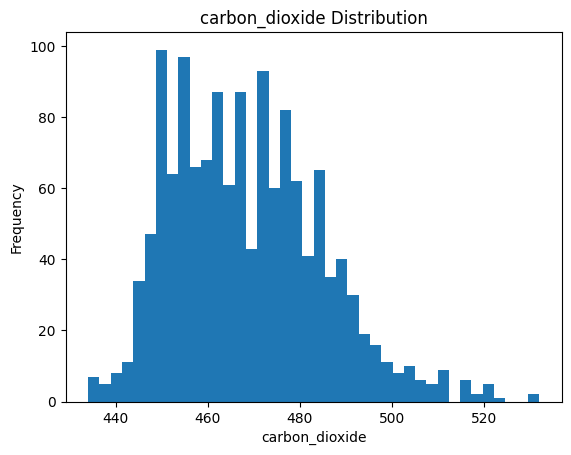

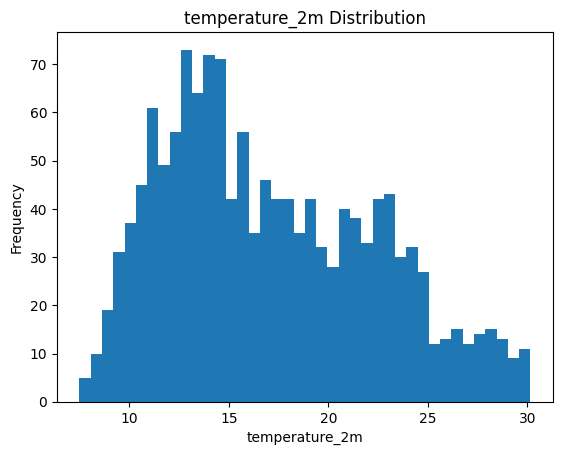

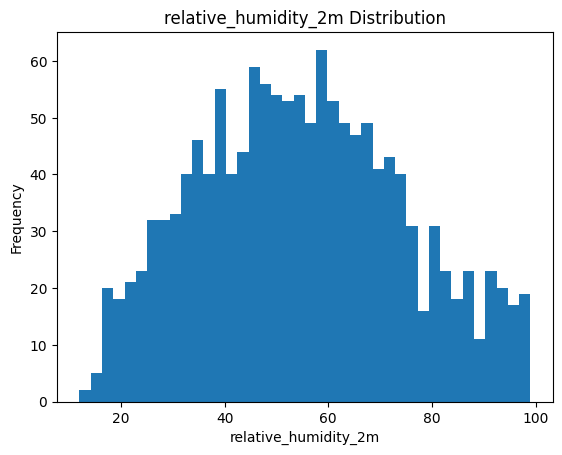

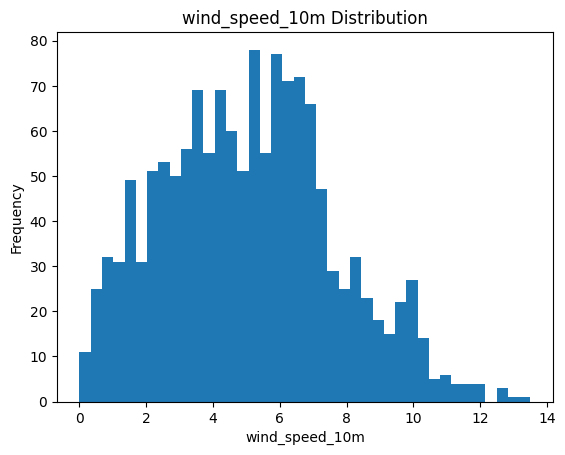

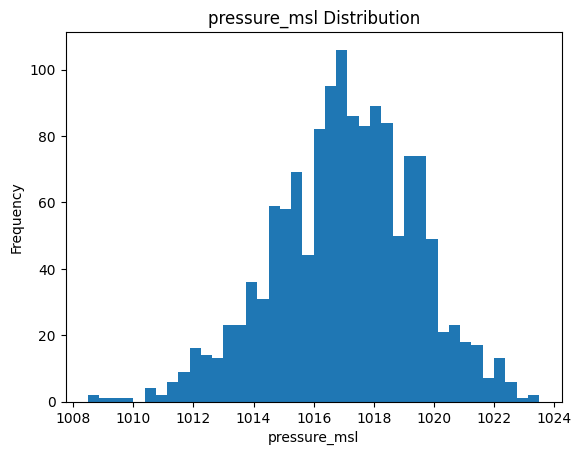

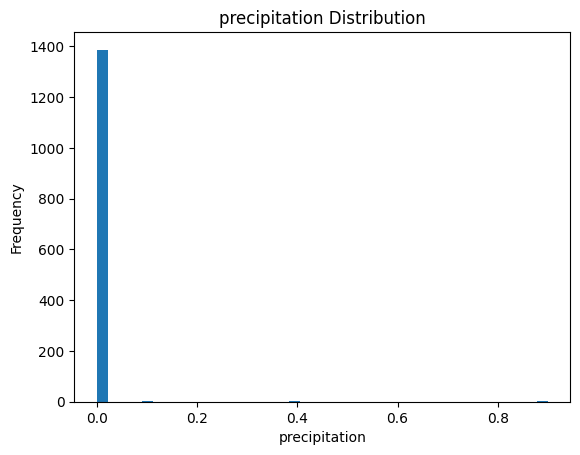

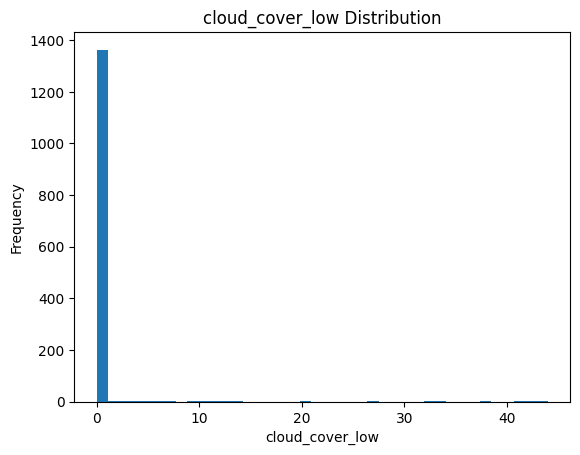

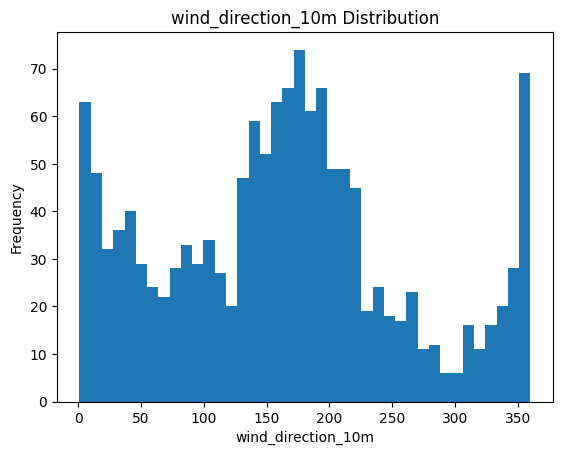

In [18]:
def plot_hist(df, col, bins=40):
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} Distribution')
    plt.show()
for col in pollutants + weather_features:
    plot_hist(merged_df, col)    

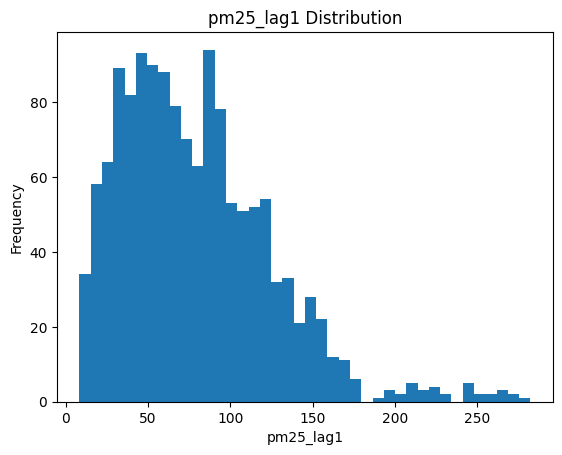

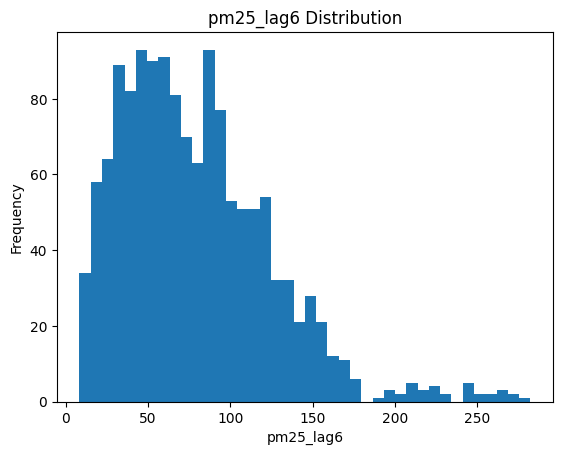

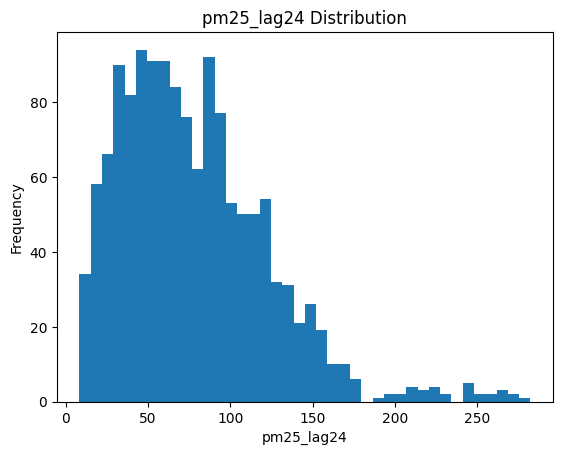

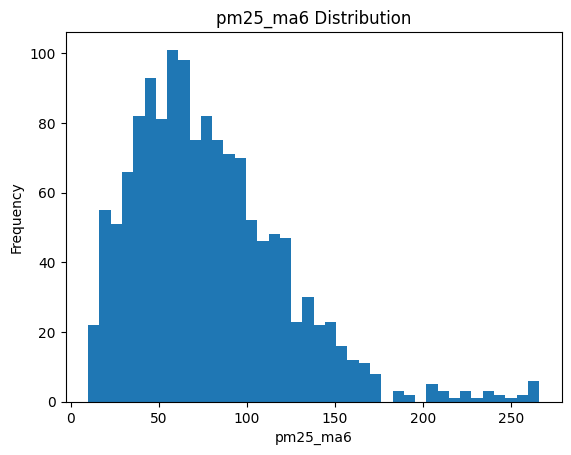

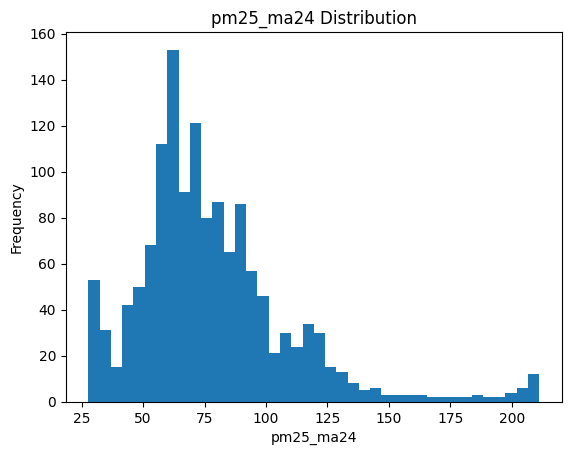

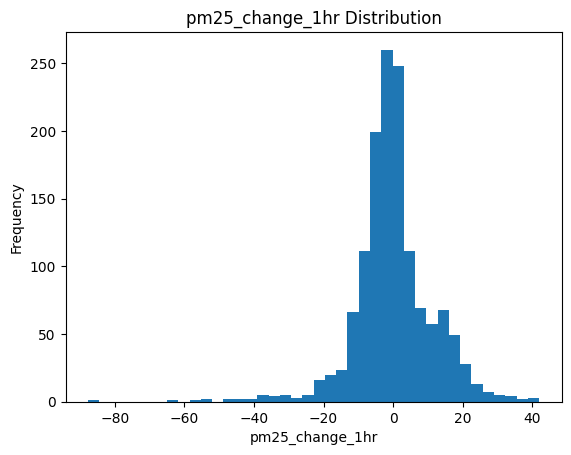

In [20]:
additional_features=['pm25_lag1', 'pm25_lag6', 'pm25_lag24', 'pm25_ma6', 'pm25_ma24', 'pm25_change_1hr']
for col in additional_features:
    plot_hist(merged_df,col)
                     

In [21]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(merged_df[['pm2_5', 'pm10', 'carbon_monoxide']]))
outliers = (z_scores > 3).any(axis=1)
print("Number of outlier rows:", outliers.sum())

Number of outlier rows: 31


# Final Feature Selection
based on histogram and scatter plot analysis, no strong
relationships were observed between the target and the following features:

a) precipitation
b) cloud_cover_low
c) wind_direction_low
d) day_of_week
e) month

Therefore, these features will be dropped from the dataset